# Unleashing Machine Learning Models for Image Classification on the FMISNT Dataset

The study leverages machine learning models for image classification on FMNIST, employing Principal Component Analysis (PCA), t-distributed Stochastic Neighbor Embedding (t-SNE), and Uniform Manifold Approximation and Projection (UMAP) for dimensionality reduction. Notably, XGBoost applied to PCA-reduced data with tuned hyperparameters outperforms other models, such as Random Forest and K-Nearest Neighbors

**Steps Covered:**

<br>

    
**1. Importing necessary libraries**

<br>

**2. Reading the dataset and printing some class labels**

<br>
    
**3. Descriptive Statistics**

      3.1 Printing the Dataset dimensions
      
      3.2 Printing the Class Distribution
      
      3.3 Sparsity measure in training data
      
      3.4 Test Dataset shape

<br>
    
**4. Dimension Reduction Techniques**
    
      4.1. Applying PCA
         
      4.2. Applying TSNE
        
      4.3 Applying UMAP
      
 <br>
            
**5.  Model Building**
    
      5.1 Baseline Random Forest + PCA
          
      5.2 Baseline Random Forest + TSNE
          
      5.3 Baseline Random Forest + UMAP
          
      5.4 Baseline KNN + PCA
          
      5.5 Baseline KNN + TSNE
          
      5.6 Baseline KNN + UMAP
          
      5.7 Baseline XGBOOST + PCA
          
      5.8 Baseline XGBOOST + TSNE
          
      5.9 Baseline XGBOOST + UMAP
      
<br>
          
      
**6. Baseline Metrics**
       
      6.1 Random Forest Metrics
           
      6.2 KNN Metrics
           
      6.3 XGBOOST Metrics
      
<br>
           
      
**7. Cross Validation and Model Selection**

<br>
      
**8. Selection of Best Hyperparameter**

<br>
      
**9. Applying the best tuned hyperparametrized model on Test Data**

<br>
      
**10. Displaying Feature Importance**

<br>
      
**11. Business Interpretation**

# 1. Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn import decompositio
from sklearn.model_selection import train_test_split
import gzip




# 2. Reading the dataset and printing some class labels

Reading Train and Test Dataset from Zalando research github page

https://github.com/zalandoresearch/fashion-mnist/tree/master/data/fashion

In [2]:
#Reshaping the data so that we can visualize the data which is in tabular pixel format

def load_data():
    with gzip.open('train-images-idx3-ubyte.gz', 'rb') as f:
        X_train = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28,28)
    with gzip.open('train-labels-idx1-ubyte.gz', 'rb') as f:
        y_train = np.frombuffer(f.read(), np.uint8, offset=8)
    with gzip.open('t10k-images-idx3-ubyte.gz', 'rb') as f:
        X_test = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28,28)
    with gzip.open('t10k-labels-idx1-ubyte.gz', 'rb') as f:
        y_test = np.frombuffer(f.read(), np.uint8, offset=8)
    return (X_train, y_train), (X_test, y_test)

(X_train, y_train), (X_test, y_test) = load_data()


#X_train[0].reshape(28,28).shape

The test data must remain unseen, so performing EDA on train dataset

**Printing some class labels**

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# Create a DataFrame
df = pd.DataFrame({'Class Names': class_names})

# Display the DataFrame
df

,Class Names
0,T-shirt/top
1,Trouser
2,Pullover
3,Dress
4,Coat
5,Sandal
6,Shirt
7,Sneaker
8,Bag
9,Ankle boot


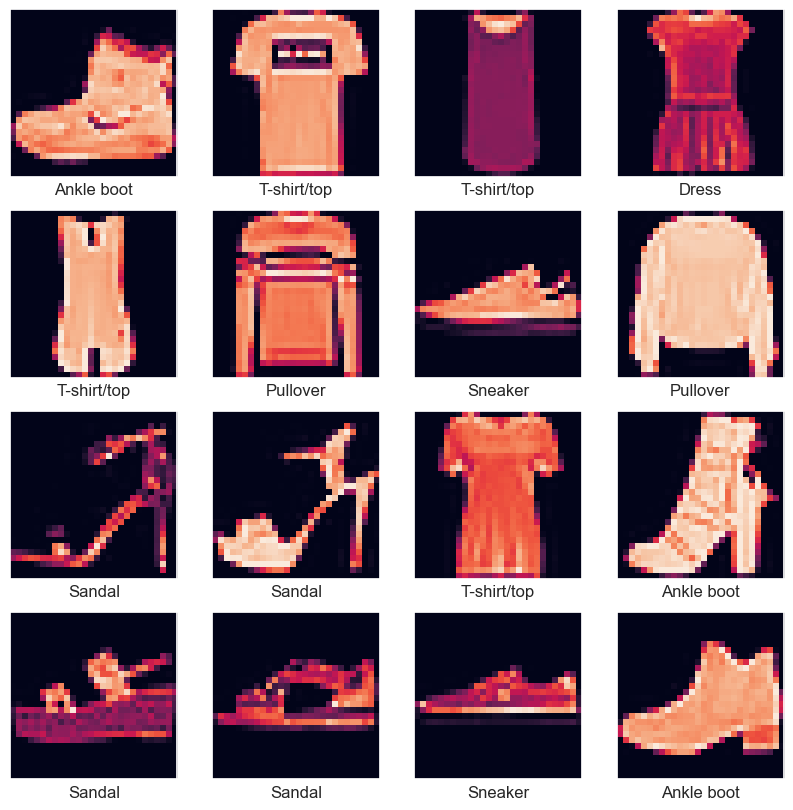

In [3]:
# Define class names (same as in the TensorFlow example)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[int(y_train[i])])
plt.show()


**Converting the data to datframe to have a structured dataframe format**

In [4]:
#Creating a dataframe

X_train_pd=pd.DataFrame(X_train.reshape(-1,28*28))
#Change row index:

X_train_pd.columns=['Pixel_'+str(i) for i in range (0,784)]

#Inserting labels in the first position

index=0

labels=y_train.tolist()

X_train_pd.insert(loc=index,column='Labels_numeric',value=labels)

items={0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle boot'}

X_train_pd['Labels']=X_train_pd['Labels_numeric'].map(items)


X_train_pd.head(6)



,Labels_numeric,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,...,Pixel_775,Pixel_776,Pixel_777,Pixel_778,Pixel_779,Pixel_780,Pixel_781,Pixel_782,Pixel_783,Labels
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Ankle boot
1,0,0,0,0,0,0,1,0,0,0,...,114,130,76,0,0,0,0,0,0,T-shirt/top
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,T-shirt/top
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,Dress
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T-shirt/top
5,2,0,0,0,0,1,0,0,0,0,...,0,0,0,133,167,73,0,0,0,Pullover


**Finding any duplicate values in train dataset**

In [5]:
#Finding any duplicates

X_train_pd[X_train_pd.duplicated()]

,Labels_numeric,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,...,Pixel_775,Pixel_776,Pixel_777,Pixel_778,Pixel_779,Pixel_780,Pixel_781,Pixel_782,Pixel_783,Labels


No duplicate values present

# 3. Descriptive Statistics

**3.1 Printing the Dataset dimensions**

In [6]:
#Printing the shape of the dataframe

print('The total number of rows and columns of the dataframe:',X_train_pd.shape[0],",",X_train_pd.shape[1])

The total number of rows and columns of the dataframe: 60000 , 786


Observation:
    
    1. Each row represents an item or class label.
      
    2. Each column represents the pixel representation of each item.
    
    3. There are a total of 10 items and 6000 unique representation of them, so a total of 60000 representations of items
       are present.
        
    4. Each item is represented by 784 pixel values starting from Pixel_0 till Pixel_784. 
    
    5. For visualization of these pixels we need to reshape to 28,28 (i.,e 28*28=784), since we stored in a dataframe 
       we transformed the image data to 1D.

**3.2 Printing the Class Distribution**

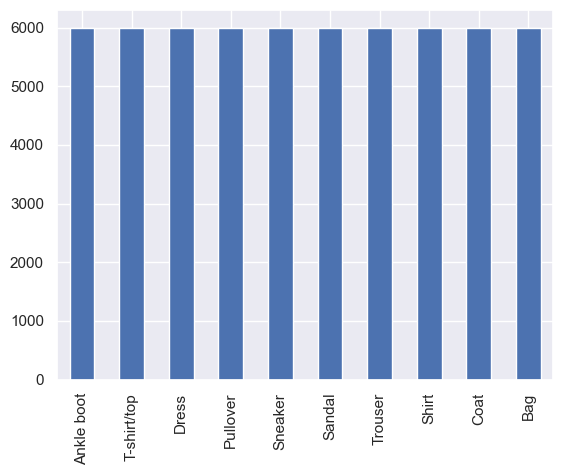

In [7]:
#Class distribution

X_train_pd.Labels.value_counts().plot.bar()
plt.show()





Observation: All classes are equally distributed and there is no class imbalance problem 

**3.3 Sparsity measure in training data**'

In [8]:
print('Sparse % in training data:')
      
print('\n',round(((len(X_train.reshape(-1,28*28)[X_train.reshape(-1,28*28)==0])/ (X_train.reshape(-1,28*28).size))*100),2),'%')

Sparse % in training data:

 50.21 %


**3.4 Test Dataset shape**

In [9]:
X_test=X_test.reshape(-1,28*28)


In [10]:
print('The train data, test data shapes are:')
print('\n',X_train_pd.shape)
print('\n',X_test.shape)

The train data, test data shapes are:

 (60000, 786)

 (10000, 784)


# 4. Dimension Reduction Techniques

Given the sparsity of data as shown above, we can apply dimension reduction techniques to reduce the feature space from p to say n

where p<<n without compromising the quality of information

**4.1 Applying PCA**

Principal Component Analysis, an application of Singular Value Decomposition is primarily used in image compression and used in
dimension reduction techniques by projecting the data that contains maximum variance, known as Principal Components.



**Constructing PCA with 2 components**

In [12]:
labels=X_train_pd['Labels']
labels_numeric=X_train_pd['Labels_numeric']

In [13]:
# initializing the pca
pca = decomposition.PCA()

In [14]:
pca.n_components = 2
# select 2 components for 2-D visualization 
pca_data = pca.fit_transform(X_train_pd.loc[:,(X_train_pd.columns!='Labels')&(X_train_pd.columns!='Labels_numeric')])
# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (60000, 2)


**Visualization of PCA reduced data, explained with only 2 components**

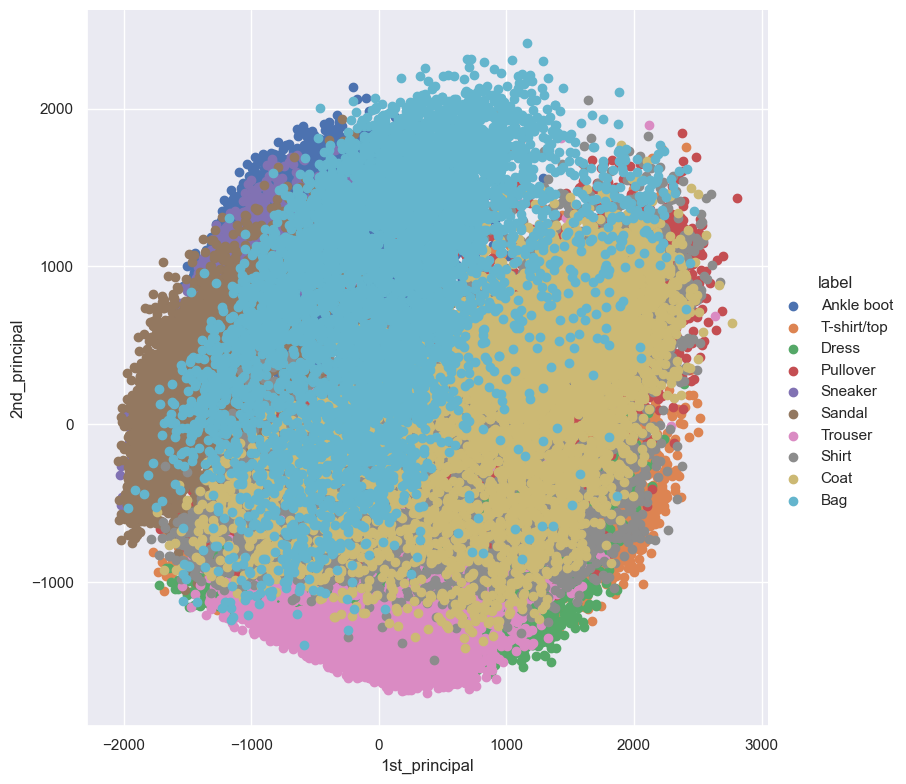

In [15]:
#Visualization:

pca_data_full = np.vstack((pca_data.T, labels)).T
pca_df_full = pd.DataFrame(data=pca_data_full, columns=("1st_principal", "2nd_principal", "label"))
sns.FacetGrid(pca_df_full, hue="label",height=8).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

Clearly there is no clear separation of class labels when applied with just 2 PCA components. 

**Let us plot the number of principal components actually required to contain atelast 95% of information**

In [17]:
# Calculate explained variance
explained_variance = pca.explained_variance_ratio_

pca.n_components = 0.95

#pca_data = pca.fit_transform(standardized_data)

pca_data = pca.fit_transform(X_train_pd.loc[:,(X_train_pd.columns!='Labels')&(X_train_pd.columns!='Labels_numeric')])

#pca_data = pca.fit_transform(standardized_data)


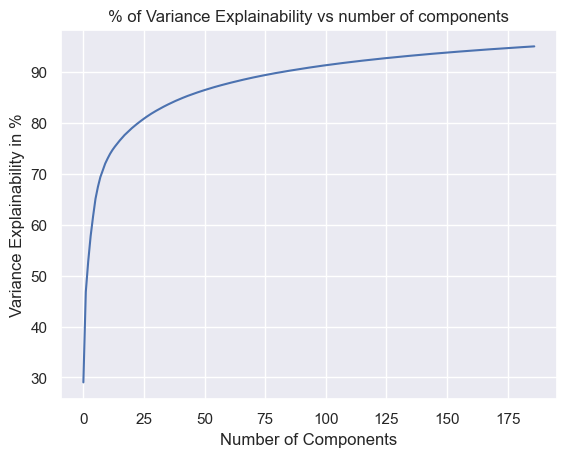

In [18]:
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.xlabel('Number of Components')
plt.ylabel('Variance Explainability in %')
plt.title('% of Variance Explainability vs number of components')
plt.plot(cumulative_variance)

**Printing the shape of pca dataframe and displaying first 5 entries**

In [19]:
pca_data.shape

(60000, 187)

In [20]:
train_pca_data_df=pd.DataFrame(pca_data)
train_pca_data_df['Label']=labels
train_pca_data_df['Label_Numeric']=labels_numeric
train_pca_data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,179,180,181,182,183,184,185,186,Label,Label_Numeric
0,-123.993791,1633.074396,-1211.041191,240.793118,-3.348351,-404.340455,-91.505515,201.375258,-32.915774,-29.809371,...,-6.175592,-6.454986,55.923027,-33.781838,-37.924937,-3.001174,22.396955,71.873330,Ankle boot,9
1,1407.928853,-451.641336,-261.027034,366.436695,215.437558,1269.183187,-148.350092,-224.292458,-115.631093,-229.845294,...,48.186297,-19.912404,82.264734,8.368019,18.713531,-6.724487,-14.500485,34.266468,T-shirt/top,0
2,-725.910795,-1101.838138,106.154242,210.031701,-105.123019,-53.417242,-2.085852,51.304638,-91.181273,-83.071415,...,-15.427153,-3.552108,-2.326743,-5.157036,-15.139028,-5.656740,-9.027976,-2.257987,T-shirt/top,0
3,31.398664,-981.067672,202.580930,378.274376,16.283660,184.904390,-112.847785,15.280460,-344.278934,69.950293,...,4.170360,-5.178750,14.378573,-34.913250,27.725281,6.908881,28.844573,-11.631706,Dress,3
4,804.119258,-1201.168720,-744.377121,-269.630116,404.982684,-150.401060,230.429128,141.440010,14.652715,-164.896820,...,-5.300549,-97.750167,-25.426103,-30.496941,-37.129486,-21.166845,1.867058,47.997917,T-shirt/top,0


**Observations:**

1. We are required to have 65 components so that we are able to achieve over 80% of variance explainability.

<br>

2. We need 187 components to explain 95% of variance 

**Plotting the PCA compressed image**

To explain the compressibility of PCA, let us plot two images: compressed image represented with only 187 pixels and original image expressed with usual 784 pixels

In [21]:
X_decompress = pca.inverse_transform(pca_data)

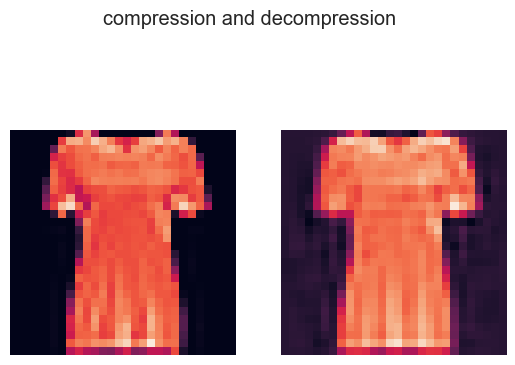

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(X_train[10].reshape(28,28))
ax2.imshow(X_decompress[10].reshape(28, 28))
fig.suptitle('compression and decompression')
ax1.axis('off')
ax2.axis('off')
plt.show()

**Observation:**
    
 As expected, we have not lost much of image information at the same time through we are successful in retaining the image information in reduced dimension feature space


# 4.2 Applying TSNE

**Note:**
    
Since TSNE is computationally intensive it is not recommended to directly apply TSNE on the raw training data. We
applied PCA to reduce the dimension from 784 to 187. Apply TSNE on the PCA data


In [23]:
from sklearn.manifold import TSNE

Let us make use of pipeline functionality from sklearn to main code relaibility

In [24]:
X_train_tsne=X_train_pd.loc[:,(X_train_pd.columns!='Labels')&(X_train_pd.columns!='Labels_numeric')]
labels=X_train_pd['Labels']

In [25]:
from sklearn.decomposition import PCA

**Applying TSNE on PCA data and we use sklearn pipeline module to create a streamlined pipeline for future purpose**

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a dimensionality reduction technique commonly used for visualizing high-dimensional data in lower-dimensional spaces, often 2D or 3D. The main idea behind t-SNE is to map high-dimensional data points to a lower-dimensional space while preserving pairwise similarities between points as much as possible.

Here are the key steps of the t-SNE algorithm:

**1. Define Similarity in High-Dimensional Space:**

<br>

Given a set of high-dimensional data points $x1$ $,$ $x2$ $,$ $.....$ $,$ $xn$ define pairwise similarities $p_{j|i}$ between points $i$ and $j$ based on their similarity in the high-dimensional space. Commonly, a Gaussian kernel is used:

**$p_{j|i} = \sum_{k \neq i} \exp\left(-\frac{\|x_i - x_k\|^2}{2\sigma_i^2}\right) \exp\left(-\frac{\|x_i - x_j\|^2}{2\sigma_i^2}\right)$**

Here ${\sigma_i}$ is the variance of the Gaussian distribution determined by the distances of the $i-th$ point to its $k$ nearest neiughbours

<br>

**2.Define Similarity in Low-Dimensional Space:**

<br>

Similarly, define pairwise similarities data points $i$ $,$ $j$ in the low-dimensional space is represented by a conditional probability $p_{j|i}$:

**$q_{j|i} = \sum_{k \neq i} \exp\left(-\|y_i - y_k\|^2\right) \exp\left(-\|y_i - y_j\|^2\right)$**

Where ${y_i}$ and ${y_j}$ are the low dimensional representations of datapoints.

<br>

**3.Objective Function:**

<br>

The t-SNE algorithm minimizes the Kullback-Leibler (KL) divergence between the two distributions $P$ and $Q:$

**$\text{KL}(P || Q) = \sum_{i} \sum_{j} p_{j|i} \log\left(\frac{q_{j|i}}{p_{j|i}}\right)$**


The optimization is typically performed using gradient descent to find the low-dimensional representations that minimize this KL divergence.





    

**References:**

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html ----> For creating pipelines
     
https://www.kaggle.com/code/parulpandey/visualizing-kannada-mnist-with-t-sne -------> TSNE and choice of hyperparameter

https://scholar.google.com/scholar?hl=en&as_sdt=0%2C44&q=Visualizing+Data+using+t-SNE&btnG=  ----> Geoff Hinton's iconic TSNE paper

https://www.youtube.com/results?search_query=statquest+tsne -----> StatQuest's TSNE step by Step explanation...BAM!!

**Building TSNE**

In [26]:
# get the start time

st = time.time()

steps = [
         ("pca", PCA(n_components=187)),
         ("tsne", TSNE(random_state = 42, n_components=2,verbose=0, perplexity=50, n_iter=350)),
        ]
pipeline_tsne = Pipeline(steps)

tsne_result=pipeline_tsne.fit_transform(X_train_tsne)


# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 315.09809041023254 seconds


**Visualization of TSNE data with 2 components**

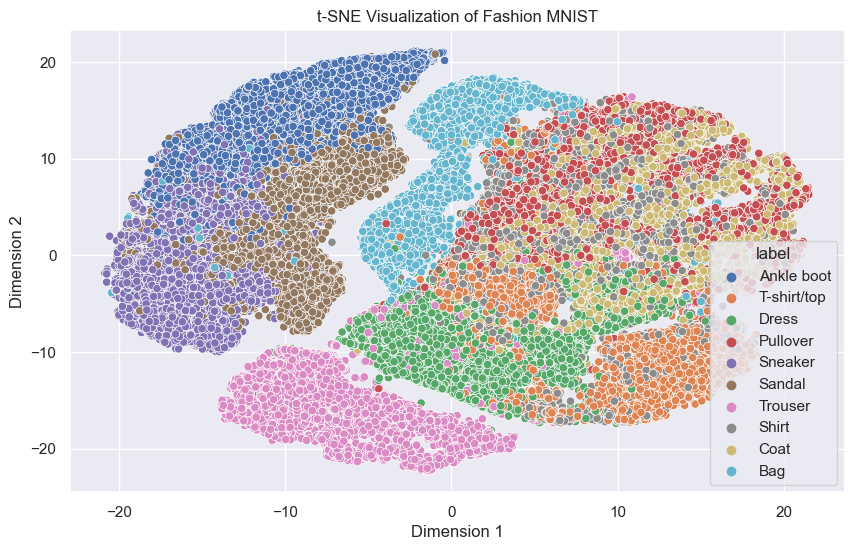

In [27]:
# Visualize the results for t-SNE on MNIST
# Create a DataFrame for the reduced 2D data

tsne_df = pd.DataFrame(data=tsne_result, columns=['Dimension 1', 'Dimension 2'])
tsne_df['label'] = labels.values

# Create a scatter plot for the 2D t-SNE data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='Dimension 1', y='Dimension 2', hue='label')
plt.title('t-SNE Visualization of Fashion MNIST')
plt.show()


**Displaying first 5 TSNE Dataset**

In [28]:
train_tsne_data_df=pd.DataFrame(tsne_df)
train_tsne_data_df['Label_Numeric']=labels_numeric
train_tsne_data_df.head()

,Dimension 1,Dimension 2,label,Label_Numeric
0,-8.865930,16.589785,Ankle boot,9
1,16.264395,-12.421183,T-shirt/top,0
2,-0.150815,-6.068116,T-shirt/top,0
3,2.607373,-7.951854,Dress,3
4,2.079318,-15.119040,T-shirt/top,0


# **4.3 Applying UMAP**

**Installing UMAP**

In [29]:
! pip install umap-learn

UMAP (Uniform Manifold Approximation and Projection) is another nonlinear dimensionality reduction technique that aims to preserve both local and global structure in the data. Unlike t-SNE, UMAP uses a mathematical framework based on Riemannian geometry.

Here are the key equations for UMAP:

**1. Fuzzy Set Membership:**

UMAP defines a fuzzy set membership measure for each data point ${x_i}$ and its representation in the low-dimensional space
${y_i}$. This measure is denoted as:
    
$FuzzyS_{ia} = \sum_{j=1}^{k} \exp\left(-\frac{\sigma_i^2}{2} \|\mathbf{x}_i - \mathbf{x}_j\|^2\right)$

$FuzzyS_{ib} = \sum_{j=1}^{l} \exp\left(-\frac{\sigma_i^2}{2} \|\mathbf{y}_i - \mathbf{y}_j\|^2\right)$

Here:

${x_i}$ and ${y_i}$ denote the high and low- dimensional representations of data point $i$ respectively

$k$ $,$ $l$ denote the number of nearest neighbours in high and low dimensional spaces

${\sigma_i}$ is the distance  to the $k-th$ nearest neighbour for the $i-th$ points.

<br>

**2. Cross Entropy:**

UMAP minimizes the cross-entropy between two fuzzy sets to find an optimal low-dimensional representation:

$\text{CrossEntropy} = \sum_{i} \left(-\sum_{j} P_{ij} \log(Q_{ij}) + \lambda \sum_{i} \sum_{j} (P_{ij} - Q_{ij})^2\right)$

Where:

$P_{ij}$  $-$ conditional probability of ${x_i}$ given ${x_j}$

<br>

$Q_{ij}$  $-$ conditional probability of ${y_i}$ given ${y_j}$

<br>

$\lambda$ $-$ is a parameter that controls the balance between preserving local and global structure




        
        


**References:**
    
1. https://arxiv.org/abs/1802.03426 ----> UMAP Original Paper

<br>
        
2. https://www.youtube.com/results?search_query=umap+statquest -----> StatQuest Video On UMAP...Double BAM!

<br>
        
3. https://www.kaggle.com/code/parulpandey/part3-visualising-kannada-mnist-with-umap ----> UMAP and choice of hyperparameter

<br>
       
4. https://pair-code.github.io/understanding-umap/ ---> Best UMAP Visualization by Andy and Adam

**Building UMAP**

In [30]:
X_train_umap=X_train_pd.loc[:,(X_train_pd.columns!='Labels')&(X_train_pd.columns!='Labels_numeric')]
labels=X_train_pd['Labels']

In [31]:
import umap

# get the start time
st = time.time()

steps = [
         ("pca", PCA(n_components=187)),
         ("umap", umap.UMAP(random_state=42)),
        ]
pipeline_umap = Pipeline(steps)

umap_result=pipeline_umap.fit_transform(X_train_umap)



# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 136.58806824684143 seconds


**Visualize the UMAP**

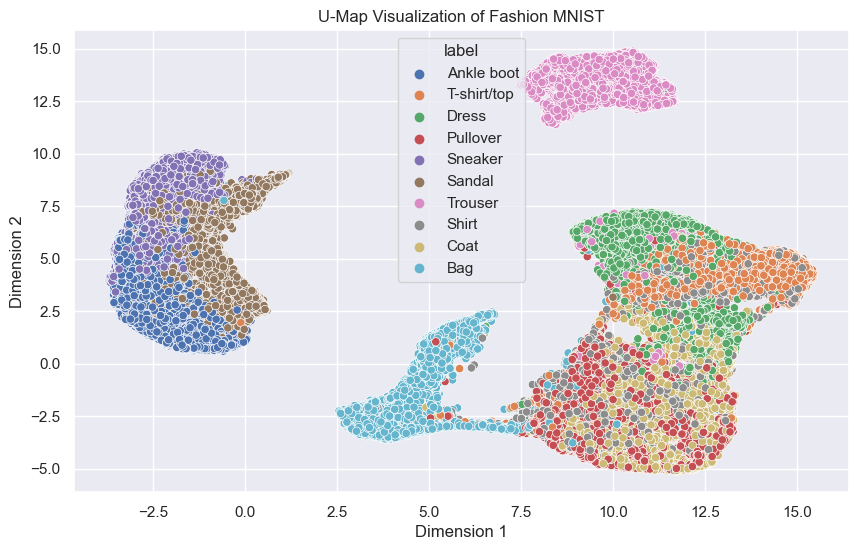

In [32]:
umap_df = pd.DataFrame(data=umap_result, columns=['Dimension 1', 'Dimension 2'])
umap_df['label'] = labels.values

# Create a scatter plot for the 2D t-SNE data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=umap_df, x='Dimension 1', y='Dimension 2', hue='label')
plt.title('U-Map Visualization of Fashion MNIST')
plt.show()


**Display the first 5 rows of UMAP data**

In [33]:
umap_df.head()

,Dimension 1,Dimension 2,label
0,-2.379449,1.812942,Ankle boot
1,15.147144,4.025966,T-shirt/top
2,10.603400,4.295260,T-shirt/top
3,11.640684,4.628334,Dress
4,11.625154,6.133903,T-shirt/top
...,...,...,...
59995,0.188549,3.479510,Sandal
59996,10.679834,14.626446,Trouser
59997,12.874143,1.896302,Dress
59998,11.129263,3.168715,T-shirt/top


**Combined Observations ---PCA,TSNE and UMAP:**

**1. PCA (Principal Component Analysis)**

It is an unsupervised linear dimensionality reduction technique which uses maximum variance governed by the SVD principle to 
reduce the dimension thereby preserving most of the information. It is not computationally expensive as compared to TSNE and UMAP.

<br>

The given dataset after applying the PCA, we obtained 187 features which preserve over 95% of explained variance instead of using the entire 784 feature values (pixels).

<br>

There are much overlapping of class labels as seen in the plot.

<br>
    
**2. TSNE (T- Distributed Stochastic Neighbour Embedding)**

TSNE is an unsupervised non-linear reduction technique

<br>

  1. TSNE is computationally expensive in general. It is not advisable to directly apply TSNE on the dataset without reducing  the dimensions uding the PCA.
  
  <br>
  
  2. We applied TSNE on the PCA data, and represented the data in two features.
  
  <br>
  
  3. It is evident that compared to PCA, there is a clear distinction between the class labels and the labels are reasonably separated from each other.
  
  <br>
  
**3. UMAP (Uniform Manifold Approximation and Projection)**

UMAP is yet another dimensional reduction technique and is computationally better compared to tsne. This method preserves the global structure of data present in higher dimension and better approximate the structure in the lower dimension.

<br>

1. We applied UMAP on the PCA data with default data and the total time taken for completion is less than the TSNE.

<br>

2. We could see that sneakers, sandal and ankle boot preserve global structure.


# 5. Model Building

Since it is multi-class classification, we use the following ML models on PCA, TSNE and UMAP data to better understand how efficient the classification is in terms of classification metrics:

Models we are going to use on train dataset:

      5.1 Baseline Random Forest + PCA
          
      5.2 Baseline Random Forest + TSNE
          
      5.3 Baseline Random Forest + UMAP
          
      5.4 Baseline KNN + PCA
          
      5.5 Baseline KNN + TSNE
          
      5.6 Baseline KNN + UMAP
          
      5.7 Baseline XGBOOST + PCA
          
      5.8 Baseline XGBOOST + TSNE
          
      5.9 Baseline XGBOOST + UMAP

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

**5.1 Random Forest on PCA Data**

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold


In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
X_train_pd = X_train_pd.loc[:,(X_train_pd.columns!='Labels') & (X_train_pd.columns!='Labels_numeric')]

In [38]:
##Defining pipeline and including hyper paramter
pca=PCA(n_components=187)
# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
rf = RandomForestClassifier(random_state=42, n_jobs=-1,oob_score=True)
# create pipeline
steps = [
         ("PCA",pca),
         ("RandomForest", rf)
        ]

# compile pipeline
combined_pipeline_pca_rf = Pipeline(steps)


In [39]:
combined_pipeline_pca_rf

Pipeline(steps=[('PCA', PCA(n_components=187)),
                ('RandomForest',
                 RandomForestClassifier(n_jobs=-1, oob_score=True,
                                        random_state=42))])

In [40]:
# get the start time
st = time.time()
combined_pipeline_pca_rf.fit(X_train_pd, y_train)
# get the end time
et = time.time()

# get the execution time
elapsed_time_rf_pca = et - st
print('Execution time:', round(elapsed_time_rf_pca/60,2), 'minutes')

Execution time: 1.53 minutes


In [42]:
#Predicting Random Forest on Train Data

y_pred_train = combined_pipeline_pca_rf.predict(X_train_pd)

rf_pca_train_accuracy = accuracy_score(y_train, y_pred_train)
rf_pca_train_precision = precision_score(y_train, y_pred_train,average='weighted')
rf_pca_train_recall = recall_score(y_train, y_pred_train,average='weighted')
rf_pca_train_f1_score = f1_score(y_train, y_pred_train,average='weighted')

print("\nRandom Forest with PCA Train:")

print("Train Accuracy:", rf_pca_train_accuracy)
print("Train Precision:", rf_pca_train_precision)
print("Train Recall:", rf_pca_train_recall)
print("Train F1 Score:", rf_pca_train_f1_score)



##Evaluating on the test data


y_pred_test = combined_pipeline_pca_rf.predict(X_test)

rf_pca_test_accuracy = accuracy_score(y_test, y_pred_test)
rf_pca_test_precision = precision_score(y_test, y_pred_test,average='weighted')
rf_pca_test_recall = recall_score(y_test, y_pred_test,average='weighted')
rf_pca_test_f1_score = f1_score(y_test, y_pred_test,average='weighted')

print("\nRandom Forest with PCA Test:")

print("Test Accuracy:", rf_pca_test_accuracy)
print("Precision:", rf_pca_test_precision)
print("Recall:", rf_pca_test_recall)
print("F1 Score:", rf_pca_test_f1_score)


Random Forest with PCA Train:
Train Accuracy: 0.9999333333333333
Train Precision: 0.9999333555481505
Train Recall: 0.9999333333333333
Train F1 Score: 0.9999333361099537

Random Forest with PCA Test:
Test Accuracy: 0.8567
Precision: 0.8552580096415117
Recall: 0.8567
F1 Score: 0.854968763682335


**5.2 Random Forest on TSNE Data**

In [43]:
train_tsne_data_df=train_tsne_data_df.loc[:,(train_tsne_data_df.columns!='Label') & (train_tsne_data_df.columns!='Label_Numeric')&(train_tsne_data_df.columns!='label')]

In [44]:
# get the start time

rf = RandomForestClassifier(random_state=42, n_jobs=-1,oob_score=True)

st = time.time()
rf.fit(train_tsne_data_df,y_train)
# get the end time
et = time.time()

# get the execution time  
elapsed_time_rf_tsne = et - st
print('Execution time:', elapsed_time_rf_tsne, 'seconds')

Execution time: 7.8759613037109375 seconds


In [45]:
#Predicting Random Forest on Train Data

y_pred_train = rf.predict(train_tsne_data_df)

rf_tsne_train_accuracy = accuracy_score(y_train, y_pred_train)
rf_tsne_train_precision = precision_score(y_train, y_pred_train,average='weighted')
rf_tsne_train_recall = recall_score(y_train, y_pred_train,average='weighted')
rf_tsne_train_f1_score = f1_score(y_train, y_pred_train,average='weighted')

print("\nRandom Forest with TSNE-Train:")

print("Train Accuracy:", rf_tsne_train_accuracy)
print("Train Precision:", rf_tsne_train_precision)
print("Train Recall:", rf_tsne_train_recall)
print("Train F1 Score:", rf_tsne_train_f1_score)

##Evaluating on the test data

# predict churn on test data
y_pred_test = rf.predict(pipeline_tsne.fit_transform(X_test))

rf_tsne_test_accuracy = accuracy_score(y_test, y_pred_test)
rf_tsne_test_precision = precision_score(y_test, y_pred_test,average='weighted')
rf_tsne_test_recall = recall_score(y_test, y_pred_test,average='weighted')
rf_tsne_test_f1_score = f1_score(y_test, y_pred_test,average='weighted')

print("\nRandom Forest with TSNE Test:")

print("Test Accuracy:", rf_tsne_test_accuracy)
print("Precision:", rf_tsne_test_precision)
print("Recall:", rf_tsne_test_recall)
print("F1 Score:", rf_tsne_test_f1_score)


Random Forest with TSNE-Train:
Train Accuracy: 0.9999
Train Precision: 0.9999000333194508
Train Recall: 0.9999
Train F1 Score: 0.9999000013861112

Random Forest with TSNE Test:
Test Accuracy: 0.6363
Precision: 0.6421795731239116
Recall: 0.6363
F1 Score: 0.6359673931347958


**5.3 Random Forest on UMAP Data**

In [46]:
X_train_umap =umap_df.loc[:,umap_df.columns!='label']

In [47]:
# get the start time

rf = RandomForestClassifier(random_state=42, n_jobs=-1,oob_score=True)

st = time.time()
rf.fit(X_train_umap,y_train)
# get the end time
et = time.time()

# get the execution time  
elapsed_time_rf_umap = et - st
print('Execution time:', elapsed_time_rf_umap, 'seconds')

Execution time: 7.715203523635864 seconds


In [48]:
#Predicting Random Forest on Train Data

y_pred_train = rf.predict(X_train_umap)

rf_umap_train_accuracy = accuracy_score(y_train, y_pred_train)
rf_umap_train_precision = precision_score(y_train, y_pred_train,average='weighted')
rf_umap_train_recall = recall_score(y_train, y_pred_train,average='weighted')
rf_umap_train_f1_score = f1_score(y_train, y_pred_train,average='weighted')

print("\nk-Random Forest with umap-Train:")

print("Train Accuracy:", rf_umap_train_accuracy)
print("Train Precision:", rf_umap_train_precision)
print("Train Recall:", rf_umap_train_recall)
print("Train F1 Score:", rf_umap_train_f1_score)

##Evaluating on the test data

# predict churn on test data
y_pred_test = rf.predict(pipeline_umap.fit_transform(X_test))

rf_umap_test_accuracy = accuracy_score(y_test, y_pred_test)
rf_umap_test_precision = precision_score(y_test, y_pred_test,average='weighted')
rf_umap_test_recall = recall_score(y_test, y_pred_test,average='weighted')
rf_umap_test_f1_score = f1_score(y_test, y_pred_test,average='weighted')

print("\nk-Random Forest with umap-Test:")

print("Test Accuracy:", rf_umap_test_accuracy)
print("Precision:", rf_umap_test_precision)
print("Recall:", rf_umap_test_recall)
print("F1 Score:", rf_umap_test_f1_score)


k-Random Forest with umap-Train:
Train Accuracy: 0.9999333333333333
Train Precision: 0.9999333416652779
Train Recall: 0.9999333333333333
Train F1 Score: 0.9999333347218751

k-Random Forest with umap-Test:
Test Accuracy: 0.428
Precision: 0.4358441162211636
Recall: 0.428
F1 Score: 0.42225773223034374


**5.4 KNN on PCA Data**

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
##Defining pipeline and including hyper paramter
pca=PCA(n_components=187)
# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
knn = KNeighborsClassifier(n_neighbors=5,p=2)
# create pipeline
steps = [
         ("PCA",pca),
         ("k-Nearest_Neighbors", knn)
        ]

# compile pipeline
combined_pipeline_knn_pca = Pipeline(steps)


In [51]:
combined_pipeline_knn_pca

Pipeline(steps=[('PCA', PCA(n_components=187)),
                ('k-Nearest_Neighbors', KNeighborsClassifier())])

In [52]:
# get the start time
st = time.time()
combined_pipeline_knn_pca.fit(X_train_pd, y_train)
# get the end time
et = time.time()

# get the execution time
elapsed_time_pca_knn = et - st
print('Execution time:',elapsed_time_pca_knn, 'seconds')

Execution time: 7.290982723236084 seconds


In [53]:
#Predicting Random Forest on Train Data

y_pred_train = combined_pipeline_knn_pca.predict(X_train_pd)

knn_pca_train_accuracy = accuracy_score(y_train, y_pred_train)
knn_pca_train_precision = precision_score(y_train, y_pred_train,average='weighted')
knn_pca_train_recall = recall_score(y_train, y_pred_train,average='weighted')
knn_pca_train_f1_score = f1_score(y_train, y_pred_train,average='weighted')

print("\nKNN with PCA on Train:")

print("Train Accuracy:", knn_pca_train_accuracy)
print("Train Precision:", knn_pca_train_precision)
print("Train Recall:", knn_pca_train_recall)
print("Train F1 Score:", knn_pca_train_f1_score)

##Evaluating on the test data

# predict churn on test data
y_pred_test = combined_pipeline_knn_pca.predict(X_test)

knn_pca_test_accuracy = accuracy_score(y_test, y_pred_test)
knn_pca_test_precision = precision_score(y_test, y_pred_test,average='weighted')
knn_pca_test_recall = recall_score(y_test, y_pred_test,average='weighted')
knn_pca_test_f1_score = f1_score(y_test, y_pred_test,average='weighted')

print("\nKNN with PCA on Test:")

print("Test Accuracy:", knn_pca_test_accuracy)
print("Precision:", knn_pca_test_precision)
print("Recall:", knn_pca_test_recall)
print("F1 Score:", knn_pca_test_f1_score)


KNN with PCA on Train:
Train Accuracy: 0.9066
Train Precision: 0.907290248295627
Train Recall: 0.9066
Train F1 Score: 0.9060442916489366

KNN with PCA on Test:
Test Accuracy: 0.8629
Precision: 0.863779855540013
Recall: 0.8629
F1 Score: 0.8622560039118429


**5.5 KNN on TSNE Data**

In [54]:
# get the start time
knn = KNeighborsClassifier(n_neighbors=5,p=2)
st = time.time()
knn.fit(train_tsne_data_df,y_train)
# get the end time
et = time.time()

# get the execution time
elapsed_time_knn_tsne = et - st
print('Execution time:', elapsed_time_knn_tsne, 'seconds')

Execution time: 0.09569048881530762 seconds


In [55]:
#Predicting Random Forest on Train Data

y_pred_train = knn.predict(train_tsne_data_df)

knn_tsne_train_accuracy = accuracy_score(y_train, y_pred_train)
knn_tsne_train_precision = precision_score(y_train, y_pred_train,average='weighted')
knn_tsne_train_recall = recall_score(y_train, y_pred_train,average='weighted')
knn_tsne_train_f1_score = f1_score(y_train, y_pred_train,average='weighted')

print("\nKNN with TSNE on Training:")

print("Train Accuracy:", knn_tsne_train_accuracy)
print("Train Precision:", knn_tsne_train_precision)
print("Train Recall:", knn_tsne_train_recall)
print("Train F1 Score:", knn_tsne_train_f1_score)

##Evaluating on the test data

# predict churn on test data
y_pred_test = knn.predict(pipeline_tsne.fit_transform(X_test))

knn_tsne_test_accuracy = accuracy_score(y_test, y_pred_test)
knn_tsne_test_precision = precision_score(y_test, y_pred_test,average='weighted')
knn_tsne_test_recall = recall_score(y_test, y_pred_test,average='weighted')
knn_tsne_test_f1_score = f1_score(y_test, y_pred_test,average='weighted')

print("\nKNN with TSNE on Test:")

print("Test Accuracy:", knn_tsne_test_accuracy)
print("Precision:", knn_tsne_test_precision)
print("Recall:", knn_tsne_test_recall)
print("F1 Score:", knn_tsne_test_f1_score)


KNN with TSNE on Training:
Train Accuracy: 0.8512
Train Precision: 0.8508839760562577
Train Recall: 0.8512
Train F1 Score: 0.8490911525830853

KNN with TSNE on Test:
Test Accuracy: 0.6355
Precision: 0.6391870950195901
Recall: 0.6355
F1 Score: 0.6338300277309743


**5.6 KNN on UMAP Data**

In [56]:
# get the start time
knn = KNeighborsClassifier(n_neighbors=5,p=2)
st = time.time()
knn.fit(X_train_umap,y_train)
# get the end time
et = time.time()

# get the execution time
elapsed_time_knn_umap = et - st
print('Execution time:', elapsed_time_knn_umap, 'seconds')

Execution time: 0.09357953071594238 seconds


In [57]:
#Predicting Random Forest on Train Data

y_pred_train = knn.predict(X_train_umap)

knn_umap_train_accuracy = accuracy_score(y_train, y_pred_train)
knn_umap_train_precision = precision_score(y_train, y_pred_train,average='weighted')
knn_umap_train_recall = recall_score(y_train, y_pred_train,average='weighted')
knn_umap_train_f1_score = f1_score(y_train, y_pred_train,average='weighted')

print("\nk-KNN with UMAP on Training:")

print("Train Accuracy:", knn_umap_train_accuracy)
print("Train Precision:", knn_umap_train_precision)
print("Train Recall:", knn_umap_train_recall)
print("Train F1 Score:", knn_umap_train_f1_score)


##Evaluating on the test data

# predict churn on test data
y_pred_test = knn.predict(pipeline_umap.fit_transform(X_test))

knn_umap_test_accuracy = accuracy_score(y_test, y_pred_test)
knn_umap_test_precision = precision_score(y_test, y_pred_test,average='weighted')
knn_umap_test_recall = recall_score(y_test, y_pred_test,average='weighted')
knn_umap_test_f1_score = f1_score(y_test, y_pred_test,average='weighted')

print("\nknn-umap on Test:")

print("Test Accuracy:", knn_umap_test_accuracy)
print("Precision:", knn_umap_test_precision)
print("Recall:", knn_umap_test_recall)
print("F1 Score:", knn_umap_test_f1_score)


k-KNN with UMAP on Training:
Train Accuracy: 0.8368166666666667
Train Precision: 0.8361911511993345
Train Recall: 0.8368166666666667
Train F1 Score: 0.8341909491307126

knn-umap on Test:
Test Accuracy: 0.0008
Precision: 0.0004234402714195896
Recall: 0.0008
F1 Score: 0.0005537555471980118


https://github.com/lmcinnes/umap/issues/25 --- Don't apply clustering UMAP data

**5.7 Baseline XGBOOST + PCA**

In [58]:
!pip install xgboost

In [59]:
import xgboost as xgb
from sklearn import metrics
from sklearn import model_selection

In [60]:
##We define the pipeline for PCA on Training data and without class imbalance
pca=PCA(n_components=187)
xgb_model = xgb.XGBClassifier()

# create pipeline
steps = [
         ("PCA",pca),
         ("xgb_model", xgb_model)
        ]

# compile pipeline
combined_pipeline_pca_xgb = Pipeline(steps)

In [61]:
# fit model

# get the start time
st = time.time()
combined_pipeline_pca_xgb.fit(X_train_pd, y_train)

# get the end time
et = time.time() 

# get the execution time
elapsed_time_xgb_pca = et - st
print('Execution time:', round(elapsed_time_xgb_pca/60,2), 'minutes')


Execution time: 1.92 minutes


In [62]:
#Predicting Random Forest on Train Data
y_pred_train = combined_pipeline_pca_xgb.predict(X_train_pd)

xgb_pca_train_accuracy = accuracy_score(y_train, y_pred_train)
xgb_pca_train_precision = precision_score(y_train, y_pred_train,average='weighted')
xgb_pca_train_recall = recall_score(y_train, y_pred_train,average='weighted')
xgb_pca_train_f1_score = f1_score(y_train, y_pred_train,average='weighted')

print("\nXGB with PCA on Train:")

print("Train Accuracy:", xgb_pca_train_accuracy)
print("Train Precision:", xgb_pca_train_precision)
print("Train Recall:", xgb_pca_train_recall)
print("Train F1 Score:", xgb_pca_train_f1_score)


##Evaluating on the test data

# predict churn on test data
y_pred_test = combined_pipeline_pca_xgb.predict(X_test)

xgb_pca_test_accuracy = accuracy_score(y_test, y_pred_test)
xgb_pca_test_precision = precision_score(y_test, y_pred_test,average='weighted')
xgb_pca_test_recall = recall_score(y_test, y_pred_test,average='weighted')
xgb_pca_test_f1_score = f1_score(y_test, y_pred_test,average='weighted')

print("\nXGB with PCA on Test:")

print("Test Accuracy:", xgb_pca_test_accuracy)
print("Precision:", xgb_pca_test_precision)
print("Recall:", xgb_pca_test_recall)
print("F1 Score:", xgb_pca_test_f1_score)


XGB with PCA on Train:
Train Accuracy: 0.9988
Train Precision: 0.9987999531829751
Train Recall: 0.9988
Train F1 Score: 0.9987997799311064

XGB with PCA on Test:
Test Accuracy: 0.8741
Precision: 0.873699261675436
Recall: 0.8741
F1 Score: 0.8737249626426116


https://stats.stackexchange.com/questions/99694/what-does-it-imply-if-accuracy-and-recall-are-the-same

**5.8 Baseline XGBOOST + TSNE**

In [63]:
##We define the pipeline for PCA on Training data and without class imbalance

xgb_model = xgb.XGBClassifier()



In [64]:
# fit model

# get the start time
st = time.time()
xgb_model.fit(train_tsne_data_df, y_train)

# get the end time
et = time.time()

# get the execution time
elapsed_time_xgb_tsne = et - st
print('Execution time:', round(elapsed_time_xgb_tsne/60,2), 'minutes')


Execution time: 0.06 minutes


In [65]:
#Predicting Random Forest on Train Data

y_pred_train = xgb_model.predict(train_tsne_data_df)

xgb_tsne_train_accuracy = accuracy_score(y_train, y_pred_train)
xgb_tsne_train_precision = precision_score(y_train, y_pred_train,average='weighted')
xgb_tsne_train_recall = recall_score(y_train, y_pred_train,average='weighted')
xgb_tsne_train_f1_score = f1_score(y_train, y_pred_train,average='weighted')

print("\nXGB with TSNE on Training:")

print("Train Accuracy:", xgb_tsne_train_accuracy)
print("Train Precision:", xgb_tsne_train_precision)
print("Train Recall:", xgb_tsne_train_recall)
print("Train F1 Score:", xgb_tsne_train_f1_score)

##Evaluating on the test data

# predict churn on test data
y_pred_test = xgb_model.predict(pipeline_tsne.fit_transform(X_test))

xgb_tsne_test_accuracy = accuracy_score(y_test, y_pred_test)
xgb_tsne_test_precision = precision_score(y_test, y_pred_test,average='weighted')
xgb_tsne_test_recall = recall_score(y_test, y_pred_test,average='weighted')
xgb_tsne_test_f1_score = f1_score(y_test, y_pred_test,average='weighted')

print("\nXGB with TSNE on Test:")

print("Test Accuracy:", xgb_tsne_test_accuracy)
print("Precision:", xgb_tsne_test_precision)
print("Recall:", xgb_tsne_test_recall)
print("F1 Score:", xgb_tsne_test_f1_score)


XGB with TSNE on Training:
Train Accuracy: 0.83315
Train Precision: 0.8315440733467598
Train Recall: 0.83315
Train F1 Score: 0.8314467149618879

XGB with TSNE on Test:
Test Accuracy: 0.6556
Precision: 0.6623679578518799
Recall: 0.6556
F1 Score: 0.6550117230527952


**5.9 Baseline XGBOOST + UMAP**

In [66]:
# fit model

# get the start time
st = time.time()
xgb_model.fit(X_train_umap, y_train)

# get the end time
et = time.time()

# get the execution time
elapsed_time_xgb_umap = et - st
print('Execution time:', round(elapsed_time_xgb_umap/60,2), 'minutes')

Execution time: 0.07 minutes


In [67]:
#Predicting Random Forest on Train Data

y_pred_train = xgb_model.predict(X_train_umap)

xgb_umap_train_accuracy = accuracy_score(y_train, y_pred_train)
xgb_umap_train_precision = precision_score(y_train, y_pred_train,average='weighted')
xgb_umap_train_recall = recall_score(y_train, y_pred_train,average='weighted')
xgb_umap_train_f1_score = f1_score(y_train, y_pred_train,average='weighted')

print("\nXGB with UMAP on Training:")

print("Train Accuracy:", xgb_umap_train_accuracy)
print("Train Precision:", xgb_umap_train_precision)
print("Train Recall:", xgb_umap_train_recall)
print("Train F1 Score:", xgb_umap_train_f1_score)


##Evaluating on the test data

# predict churn on test data
y_pred_test = xgb_model.predict(pipeline_umap.fit_transform(X_test))

xgb_umap_test_accuracy = accuracy_score(y_test, y_pred_test)
xgb_umap_test_precision = precision_score(y_test, y_pred_test,average='weighted')
xgb_umap_test_recall = recall_score(y_test, y_pred_test,average='weighted')
xgb_umap_test_f1_score = f1_score(y_test, y_pred_test,average='weighted')

print("\nXGB UMAP on Test:")

print("Test Accuracy:", xgb_umap_test_accuracy)
print("Precision:", xgb_umap_test_precision)
print("Recall:", xgb_umap_test_recall)
print("F1 Score:", xgb_umap_test_f1_score)


XGB with UMAP on Training:
Train Accuracy: 0.8167833333333333
Train Precision: 0.8152063872728399
Train Recall: 0.8167833333333333
Train F1 Score: 0.8147016036575745

XGB UMAP on Test:
Test Accuracy: 0.0067
Precision: 0.06808302135029694
Recall: 0.0067
F1 Score: 0.011391142751411506


# **6. Baseline Metrics**

**6.1 Random Forest Metrics:**

In [68]:
import pandas as pd

# Example values for RF on PCA (replace these with your actual metric values)
rf_pca_metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Train': [rf_pca_train_accuracy, rf_pca_train_precision, rf_pca_train_recall, rf_pca_train_f1_score],
    'Test': [rf_pca_test_accuracy, rf_pca_test_precision, rf_pca_test_recall, rf_pca_test_f1_score]
}

# Example values for RF on t-SNE (replace these with your actual metric values)
rf_tsne_metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Train': [rf_tsne_train_accuracy, rf_tsne_train_precision, rf_tsne_train_recall, rf_tsne_train_f1_score],
    'Test': [rf_tsne_test_accuracy, rf_tsne_test_precision, rf_tsne_test_recall, rf_tsne_test_f1_score]
}


rf_umap_metrics={
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Train': [rf_umap_train_accuracy, rf_umap_train_precision, rf_umap_train_recall, rf_umap_train_f1_score],
    'Test': [rf_umap_test_accuracy, rf_umap_test_precision, rf_umap_test_recall, rf_umap_test_f1_score]
}
# Create DataFrames
rf_pca_df = pd.DataFrame(rf_pca_metrics)
rf_tsne_df = pd.DataFrame(rf_tsne_metrics)
rf_umap_df = pd.DataFrame(rf_umap_metrics)

# Add an index for model labels
rf_pca_df = rf_pca_df.set_index(pd.Index(['RF on PCA'] + [''] * (len(rf_pca_df) - 1)))
rf_tsne_df = rf_tsne_df.set_index(pd.Index(['RF on t-SNE'] + [''] * (len(rf_tsne_df) - 1)))
rf_umap_df=rf_umap_df.set_index(pd.Index(['RF on UMAP'] + [''] * (len(rf_tsne_df) - 1)))

# Concatenate DataFrames vertically
rf_total = pd.concat([rf_pca_df, rf_tsne_df,rf_umap_df])

# Print the combined DataFrame with the specified table name
rf_total


,Metric,Train,Test
RF on PCA,Accuracy,0.999933,0.856700
,Precision,0.999933,0.855258
,Recall,0.999933,0.856700
,F1 Score,0.999933,0.854969
RF on t-SNE,Accuracy,0.999900,0.636300
,Precision,0.999900,0.642180
,Recall,0.999900,0.636300
,F1 Score,0.999900,0.635967
RF on UMAP,Accuracy,0.999933,0.428000
,Precision,0.999933,0.435844


**6.2 KNN Metrics:**

In [69]:
import pandas as pd

# Example values for RF on PCA (replace these with your actual metric values)
knn_pca_metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Train': [knn_pca_train_accuracy, knn_pca_train_precision, knn_pca_train_recall, knn_pca_train_f1_score],
    'Test': [knn_pca_test_accuracy, knn_pca_test_precision, knn_pca_test_recall, knn_pca_test_f1_score]
}

# Example values for RF on t-SNE (replace these with your actual metric values)
knn_tsne_metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Train': [knn_tsne_train_accuracy, knn_tsne_train_precision, knn_tsne_train_recall, knn_tsne_train_f1_score],
    'Test': [knn_tsne_test_accuracy, knn_tsne_test_precision, knn_tsne_test_recall, knn_tsne_test_f1_score]
}


knn_umap_metrics={
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Train': [knn_umap_train_accuracy, knn_umap_train_precision, knn_umap_train_recall, knn_umap_train_f1_score],
    'Test': [knn_umap_test_accuracy, knn_umap_test_precision, knn_umap_test_recall, knn_umap_test_f1_score]
}
# Create DataFrames
knn_pca_df = pd.DataFrame(knn_pca_metrics)
knn_tsne_df = pd.DataFrame(knn_tsne_metrics)
knn_umap_df = pd.DataFrame(knn_umap_metrics)

# Add an index for model labels
knn_pca_df = knn_pca_df.set_index(pd.Index(['KNN on PCA'] + [''] * (len(knn_pca_df) - 1)))
knn_tsne_df = knn_tsne_df.set_index(pd.Index(['KNN on t-SNE'] + [''] * (len(knn_tsne_df) - 1)))
knn_umap_df=knn_umap_df.set_index(pd.Index(['KNN on UMAP'] + [''] * (len(knn_umap_df) - 1)))

# Concatenate DataFrames vertically
knn_total = pd.concat([knn_pca_df, knn_tsne_df,knn_umap_df])

# Print the combined DataFrame with the specified table name
knn_total


,Metric,Train,Test
KNN on PCA,Accuracy,0.906600,0.862900
,Precision,0.907290,0.863780
,Recall,0.906600,0.862900
,F1 Score,0.906044,0.862256
KNN on t-SNE,Accuracy,0.851200,0.635500
,Precision,0.850884,0.639187
,Recall,0.851200,0.635500
,F1 Score,0.849091,0.633830
KNN on UMAP,Accuracy,0.836817,0.000800
,Precision,0.836191,0.000423


**6.3 XgBoost Metrics:**

In [70]:
# Example values for RF on PCA (replace these with your actual metric values)
xgb_pca_metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Train': [xgb_pca_train_accuracy, xgb_pca_train_precision, xgb_pca_train_recall, xgb_pca_train_f1_score],
    'Test': [xgb_pca_test_accuracy, xgb_pca_test_precision, xgb_pca_test_recall, xgb_pca_test_f1_score]
}

# Example values for RF on t-SNE (replace these with your actual metric values)
xgb_tsne_metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Train': [xgb_tsne_train_accuracy, xgb_tsne_train_precision, xgb_tsne_train_recall, xgb_tsne_train_f1_score],
    'Test': [xgb_tsne_test_accuracy, xgb_tsne_test_precision, xgb_tsne_test_recall, xgb_tsne_test_f1_score]
}


xgb_umap_metrics={
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Train': [xgb_umap_train_accuracy, xgb_umap_train_precision, xgb_umap_train_recall, xgb_umap_train_f1_score],
    'Test': [xgb_umap_test_accuracy, xgb_umap_test_precision, xgb_umap_test_recall, xgb_umap_test_f1_score]
}
# Create DataFrames
xgb_pca_df = pd.DataFrame(xgb_pca_metrics)
xgb_tsne_df = pd.DataFrame(xgb_tsne_metrics)
xgb_umap_df = pd.DataFrame(xgb_umap_metrics)

# Add an index for model labels
xgb_pca_df = xgb_pca_df.set_index(pd.Index(['XGB on PCA'] + [''] * (len(xgb_pca_df) - 1)))
xgb_tsne_df = xgb_tsne_df.set_index(pd.Index(['XGB on t-SNE'] + [''] * (len(xgb_tsne_df) - 1)))
xgb_umap_df=xgb_umap_df.set_index(pd.Index(['XGB on UMAP'] + [''] * (len(xgb_umap_df) - 1)))

# Concatenate DataFrames vertically
xgb_total = pd.concat([xgb_pca_df, xgb_tsne_df,xgb_umap_df])

# Print the combined DataFrame with the specified table name
xgb_total


,Metric,Train,Test
XGB on PCA,Accuracy,0.998800,0.874100
,Precision,0.998800,0.873699
,Recall,0.998800,0.874100
,F1 Score,0.998800,0.873725
XGB on t-SNE,Accuracy,0.833150,0.655600
,Precision,0.831544,0.662368
,Recall,0.833150,0.655600
,F1 Score,0.831447,0.655012
XGB on UMAP,Accuracy,0.816783,0.006700
,Precision,0.815206,0.068083


**Note:**

Reason out UMAP underperforms all the cases and far worse in KNN------->  https://github.com/lmcinnes/umap/issues/25

# **7. Cross Validation and Model Selection**

Compared to all baseline models, XGBOOST seem to give better accuracy and F1-Score. Let us use hyperparameter tuning on XgBoost with PCA data

In [71]:
from sklearn import metrics
from sklearn import model_selection

In [72]:
##We define the pipeline for PCA on Training data and without class imbalance

xgb_model = xgb.XGBClassifier()
parameters = {'learning_rate': [0.1, 0.2, 0.3],
              'max_depth': [2, 4, 6],
              'min_child_weight': [5,10,20],
              'n_estimators': [100,200,300]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                            needs_proba=True,
                             needs_threshold=False)

folds = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 42)

In [73]:
clf_xgb = model_selection.RandomizedSearchCV(estimator=xgb_model,
                                      param_distributions=parameters,
                                       n_jobs=-1,
                                       cv=folds,
                                       return_train_score=True,
                                       error_score='raise',
                                        n_iter=50)

In [74]:
steps = [
         ("pca", PCA(n_components=187)),
         ("clf_xgb", clf_xgb),
        ]
pipeline_pca = Pipeline(steps)

print(pipeline_pca)

Pipeline(steps=[('pca', PCA(n_components=187)),
                ('clf_xgb',
                 RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
                                    error_score='raise',
                                    estimator=XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            device=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=F...
                                              

In [75]:
# fit model

# get the start time
st = time.time()
pipeline_pca.fit(X_train_pd, y_train)

# get the end time
et = time.time()

# get the execution time
elapsed_time_xgb_pca = et - st
print('Execution time:', round(elapsed_time_xgb_pca/60,2), 'minutes')


Execution time: 201.22 minutes


# **8. Selection of Best Hyperparameter**

In [76]:
# print best hyperparameters
print("Best hyperparameters: ", pipeline_pca.named_steps['clf_xgb'].best_params_)


Best hyperparameters:  {'n_estimators': 300, 'min_child_weight': 10, 'max_depth': 6, 'learning_rate': 0.2}


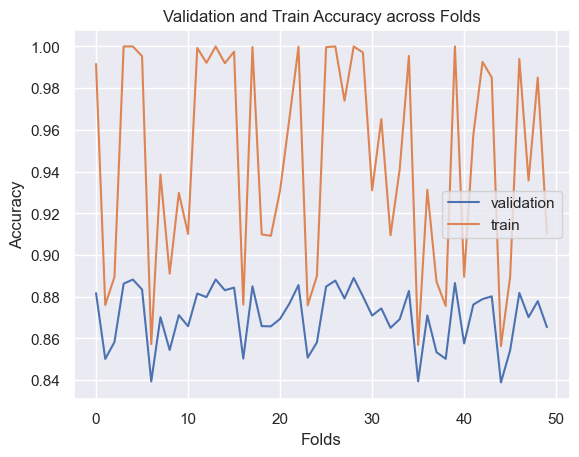

In [77]:
test_scores = clf_xgb.cv_results_['mean_test_score']
train_scores = clf_xgb.cv_results_['mean_train_score'] 

plt.plot(test_scores, label='validation')
plt.plot(train_scores, label='train')
plt.xlabel('Folds')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.title('Validation and Train Accuracy across Folds')
plt.show()

In [78]:
# print best hyperparameters
print("Best AUC: ", pipeline_pca.named_steps['clf_xgb'].best_score_)

Best AUC:  0.8890333333333333


In [79]:
#Predict on Test
xgb_model = xgb.XGBClassifier(learning_rate=0.2,n_estimators=300,min_child_weight=5,max_depth=6)
steps = [
         ("pca", PCA(n_components=187)),
         ("clf_xgb", xgb_model),
        ]
pipeline_pca = Pipeline(steps)

print(pipeline_pca)

Pipeline(steps=[('pca', PCA(n_components=187)),
                ('clf_xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None, min_child_weight=5,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_es

# **9. Applying the best tuned hyperparametrized model on Test Data**

In [80]:
#Predict on Test

pipeline_pca.fit(X_train_pd, y_train)

##Evaluating on the test data

# predict churn on test data
y_pred_test = pipeline_pca.predict(X_test)

xg_pca_test_accuracy = accuracy_score(y_test, y_pred_test)
xg_pca_test_precision = precision_score(y_test, y_pred_test,average='weighted')
xg_pca_test_recall = recall_score(y_test, y_pred_test,average='weighted')
xg_pca_test_f1_score = f1_score(y_test, y_pred_test,average='weighted')

print("\nk-XGBOOST with PCA on TEST:")

print("Test Accuracy:", xg_pca_test_accuracy)
print("Precision:", xg_pca_test_precision)
print("Recall:", xg_pca_test_recall)
print("F1 Score:", xg_pca_test_f1_score)


k-XGBOOST with PCA on TEST:
Test Accuracy: 0.8838
Precision: 0.8831785725537314
Recall: 0.8838
F1 Score: 0.8832824183465938


In [81]:
xgb_pca_metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Test': [xg_pca_test_accuracy, xg_pca_test_precision, xg_pca_test_recall, xg_pca_test_f1_score]
}

xgb_pca_df=pd.DataFrame(xgb_pca_metrics)

xgb_pca_df = xgb_pca_df.set_index(pd.Index(['XGB on PCA TEST'] + [''] * (len(xgb_pca_df) - 1)))

xgb_pca_df

,Metric,Test
XGB on PCA TEST,Accuracy,0.883800
,Precision,0.883179
,Recall,0.883800
,F1 Score,0.883282


Printing the confusion matrix on test

In [82]:
from sklearn.metrics import confusion_matrix

In [88]:
# Generate the confusion matrix

cm = confusion_matrix(y_test, y_pred_test)

# Create a DataFrame with class labels
confusion_df = pd.DataFrame(cm, index=class_names, columns=class_names)

print("Confusion Matrix:")
confusion_df

Confusion Matrix:


,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,859,0,13,24,4,3,87,0,10,0
Trouser,3,969,3,18,3,0,3,0,1,0
Pullover,19,1,802,13,90,1,72,0,2,0
Dress,20,4,15,905,24,0,29,0,3,0
Coat,0,1,84,28,820,0,64,0,3,0
Sandal,0,0,0,1,0,956,0,27,2,14
Shirt,131,0,104,22,73,1,655,0,14,0
Sneaker,0,0,0,0,0,19,0,952,0,29
Bag,2,0,7,4,3,4,6,5,969,0
Ankle boot,0,0,0,0,0,13,0,35,1,951


# **10. Displaying Feature Importance**

Top-20 Feature Importance

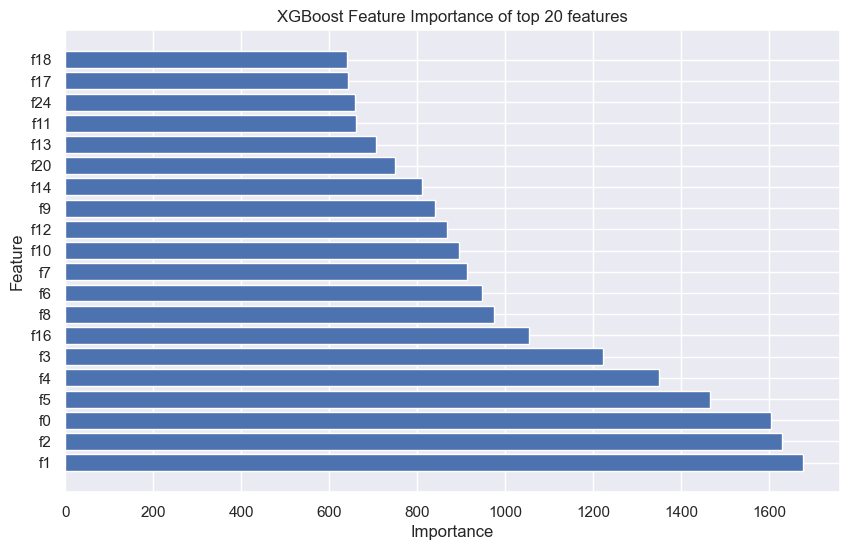

In [93]:
feature_importance = pipeline_pca.named_steps['clf_xgb'].get_booster().get_score(importance_type='weight')

# Extracting feature names and importance values
sorted_feature_importance = dict(sorted(feature_importance.items(), key=lambda item: item[1],reverse=True))
feature_names_20 = list(sorted_feature_importance.keys())[0:20]
importance_values_20 = list(sorted_feature_importance.values())[0:20]

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names_20, importance_values_20)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance of top 20 features')
plt.show()

# 11. Business Implications

Here are a few business implications that we believe can be leveraged using this application, although there could be numerous other applications:

1. **Fault Detection of Items:**
   - Through a thorough analysis of pixel values to understand the texture and types of clothing, this application can effectively identify anomalies and faults in clothing items.

<br>

2. **Clothing Segregation:**
   - The application can be utilized to identify and group similar clothing items, streamlining the process of product segmentation.
   
<br>

3. **Personalized Recommendations:**
   - Building on the above application, the system can recommend similar products to customers based on their preferences, contributing to trend analysis and boosting product sales.
   
<br>

4. **Creation of New Fashion Products:**
   - Beyond item classification, this method can provide insights into the properties of clothing, facilitating the invention or modification of fashion items and the creation of innovative products.
   
<br>

5. **Automation of Billing Processes and Quality Checks:**
   - By leveraging item classification and the capabilities discussed in the first point, the application supports automation in billing processes and the identification of faults in clothing, reducing manual efforts significantly.